In [1]:
import sys
print (sys.prefix)


c:\users\rissa\appdata\local\programs\python\python37-32


In [55]:
import pandas as pd
import datetime
import pandas_datareader.data as wb
from pandas import Series, DataFrame
from numpy import *

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.now()

df = wb.DataReader("AAPL", "yahoo", start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999
2019-09-06,214.419998,212.509995,214.050003,213.259995,19350800.0,213.259995


In [36]:
# rolling mean: smooths out avg price by creating an average price that is updated constantly
close_px = df['Adj Close']
moving_avg = close_px.rolling(window = 100).mean()
print (moving_avg)


Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2019-08-30    198.498685
2019-09-03    198.564745
2019-09-04    198.682279
2019-09-05    198.841507
2019-09-06    198.996962
Name: Adj Close, Length: 1932, dtype: float64


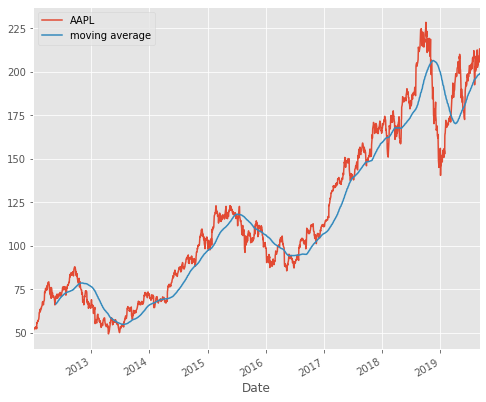

In [37]:
# plotting out the moving average with matplotlib to visualize the data
# the moving average line exhibits the increasing or decreasing trend of the stocks

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc ('figure', figsize=(8, 7))
mpl.__version__

# adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
moving_avg.plot(label='moving average')
plt.legend()

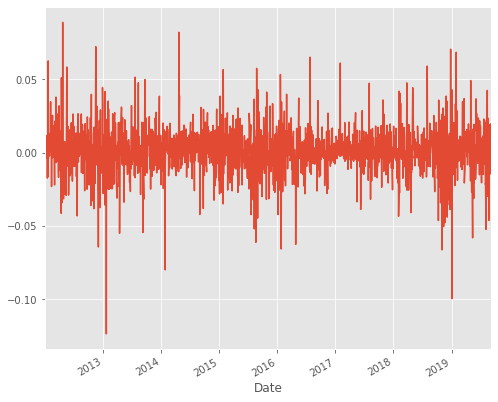

In [38]:
# Purchase stocks when they are in downturn and sell vice versa

# To determine the risk and return: we calculate "Return Deviation"

# How is expected return calculated:
# The sum for all investments(weight of each asset * Exp return)

# formula
rets = close_px / close_px.shift(1)-1
rets.plot(label = 'return')

# We can see on the plot that the stocks had a 10% drop in 2013

In [39]:
# Analysing the competiton

dfcomp = wb.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MFST']
                       , 'yahoo', start = start, end = end) ['Adj Close']

print (dfcomp)


Symbols           AAPL         GE         GOOG         IBM    MFST
Date                                                              
2012-01-03   51.269413  13.666215   331.462585  143.065247     NaN
2012-01-04   51.544937  13.815087   332.892242  142.481613     NaN
2012-01-05   52.117188  13.807643   328.274536  141.805878     NaN
2012-01-06   52.662014  13.882080   323.796326  140.177872     NaN
2012-01-09   52.578468  14.038386   310.067780  139.448303     NaN
...                ...        ...          ...         ...     ...
2019-08-30  208.740005   8.250000  1188.099976  135.529999  0.0189
2019-09-03  205.699997   8.330000  1168.390015  134.100006  0.0180
2019-09-04  209.190002   8.800000  1181.410034  136.320007  0.0190
2019-09-05  213.279999   8.810000  1211.380005  140.970001  0.0160
2019-09-06  213.259995   8.710000  1204.930054  140.570007  0.0170

[1932 rows x 5 columns]


In [41]:
# Now we do a correlation analysis to determine if one competitor affects another
# How?
# Running the percentage change and the correlation function in pandas
# percentage change: How much price has changed relative to the previous day which defines thee returns
# correlation will simply show if there is any correlaton between our stocks

retscomp = dfcomp.pct_change()
corr = retscomp.corr()

Text(0, 0.5, 'Returns GE')

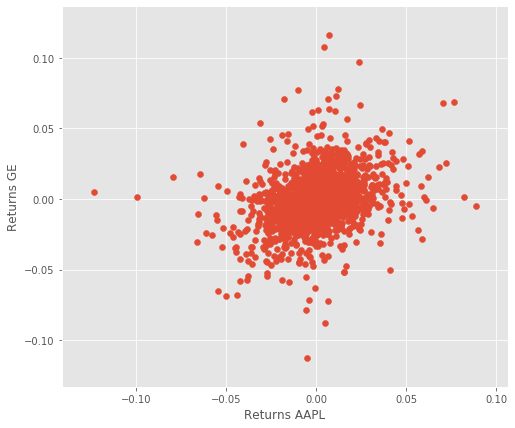

In [26]:
# plotting our correlations with scatterplot to view the return distrinutions.

plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

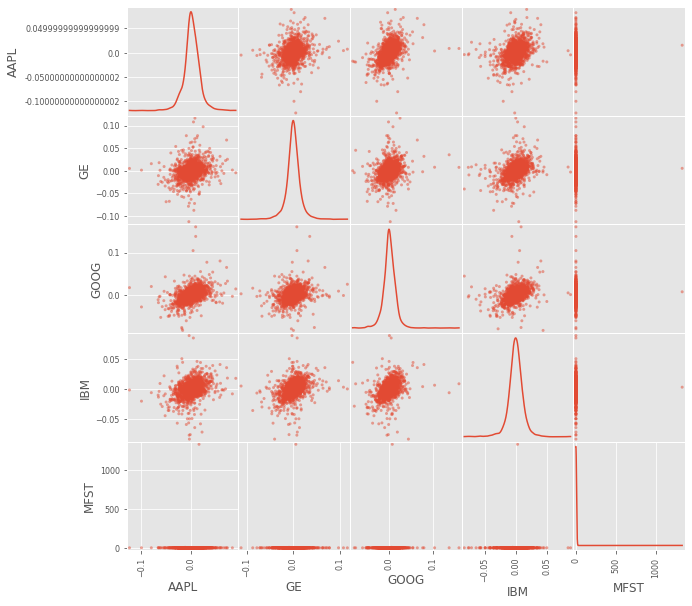

In [42]:
# # In the plot we can see that there is a positive correlation between the stocks of r=0.5. 
# To further analyze the data, we will plot the scatter_matrix to visualize potential correlations
# # we will use the Kernel Density Estimate (KDE) which is a fundamental data smoothing problem that will allow us to 
# generate estimations of the overall distributions.

# For further reading on KDE:
# https://en.wikipedia.org/wiki/Kernel_density_estimation?source=post_page-----a8d8a7b50ee7----------------------

from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

# The plot shows us most of the distributions with approx positive correlations


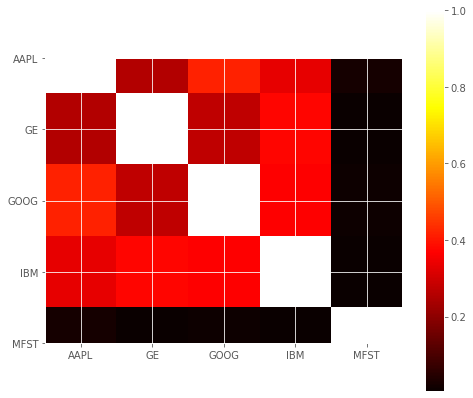

In [43]:
# For further analysis, we will validate the positively correlated
# stocks by using heap maps to visualize correlation ranges among competing stocks

# Key: lighet the color of the plot, the positively the correaltion is

plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

# NOTE: Correlation does not mean causation, the trends can
# correlate due to changes in tech

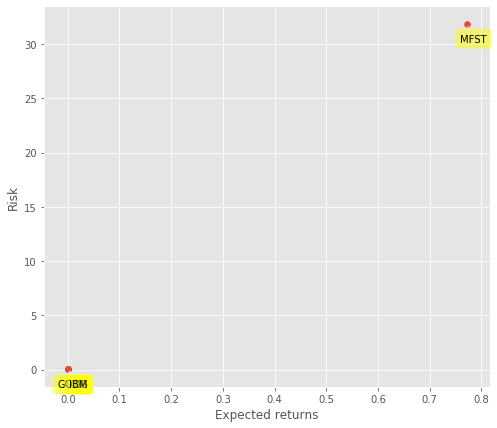

In [44]:
# Analysing each stocks risks and returns
# Two metrics:
#     1. Return rate: average of returns
#     2. Risk: SD of returns

plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [52]:
# Needed features for ML models

dfreg = df.loc[:, ['Adj Close', 'Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [66]:
# Process and Clean data before passing to the prediction models

# 1. Drop missing value
# 2. Seperate the label here, want to predict AdjClose
# 3. Scale x to ensure uniform distribution for linear regression
# 4. find data series of late X and early Y (train) for model gen and eval
# 5. seperate label and indentify as y
# 6. Seperation of training and testing of modelsby cross validation train 
# test split

# import math

# # 1. Drop missing value
# dfreg.fillna(value=-9999, inplace=True)

# #  Seperate 1 % of data to forecast
# forecast_out = int(math.ceil(0.01 * len(dfreg)))

# # 2. Seperate the label here, want to predict AdjClose
# forecast_col = 'Adj Close'
# dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
# X = np.array(dfreg.drop(['label'], 1))

# # 3. Scale the X-axis for uniform distribution in the linear reg
# X = preprocessing.scale(X)

# # 4. Find Data series of late x and early X(train) for model generation and eval
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]

# # 5. Seperate label and identify as y
# y = np.array(dfreg['label'])
# y = y[:-forecast_out]


import numpy as np
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X_train = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [67]:
##### Stock prediction #####

# using scikit learn for  our ML training models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Simple Linear Analysis and Quadratic Discriminant Analysis

# Linear Analysis shows a straight line that determines the 
# relationship between two or more variables.

# Quadratic Discriminant Analysis allows working with
# polynomials which will produce curves

# Linear Regression: Dependant Var - Y axis
#                     IND Var - X

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)


NameError: name 'y_train' is not defined

In [68]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

NameError: name 'y_train' is not defined

In [69]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
# results
('The linear regression confidence is ', 0.96399641826551985)
('The quadratic regression 2 confidence is ', 0.96492624557970319)
('The quadratic regression 3 confidence is ', 0.9652082834532858)
('The knn regression confidence is ', 0.92844658034790639)

NameError: name 'X_test' is not defined